# MODIS-Aqua Satellite Tutorial
---

This notebook walks through plotting data from the NASA MODIS-Aqua Satellite. Data can be downloaded here: https://neo.sci.gsfc.nasa.gov/view.php?datasetId=MY1DMM_CHLORA&date=2019-02-01 and more information about the satellite can be found here: https://oceancolor.gsfc.nasa.gov/data/aqua/.

In [1]:
# Imports 
import netCDF4 
import xarray as xr
import os
import numpy as np
import matplotlib.pyplot as plt

Point Python to the folder containing your data. Ideally, it's in the same directory as this Jupyter notebook.

In [2]:
parent_dir = os.getcwd()
file_path = os.path.join(parent_dir, 'data')
files = [item for item in os.listdir(file_path) if not item.startswith('.')]

Make sure we got the right files:

In [3]:
files

['A20190012019031.L3m_MO_CHL_chlor_a_4km.nc',
 'A20190322019059.L3m_MO_CHL_chlor_a_4km.nc',
 'A20190602019090.L3m_MO_CHL_chlor_a_4km.nc',
 'A20190912019120.L3m_MO_CHL_chlor_a_4km.nc',
 'A20191212019151.L3m_MO_CHL_chlor_a_4km.nc',
 'A20191522019181.L3m_MO_CHL_chlor_a_4km.nc',
 'A20191822019212.L3m_MO_CHL_chlor_a_4km.nc',
 'A20192132019243.L3m_MO_CHL_chlor_a_4km.nc',
 'A20192442019273.L3m_MO_CHL_chlor_a_4km.nc',
 'A20192742019304.L3m_MO_CHL_chlor_a_4km.nc',
 'A20193052019334.L3m_MO_CHL_chlor_a_4km.nc',
 'A20193352019365.L3m_MO_CHL_chlor_a_4km.nc']

Open these files with xarray:

In [4]:
datasets = [xr.open_dataset('./data/' + file) for file in files]

First, let's do something impressive and make a plot of the globe! Just use 1 dataset for this.

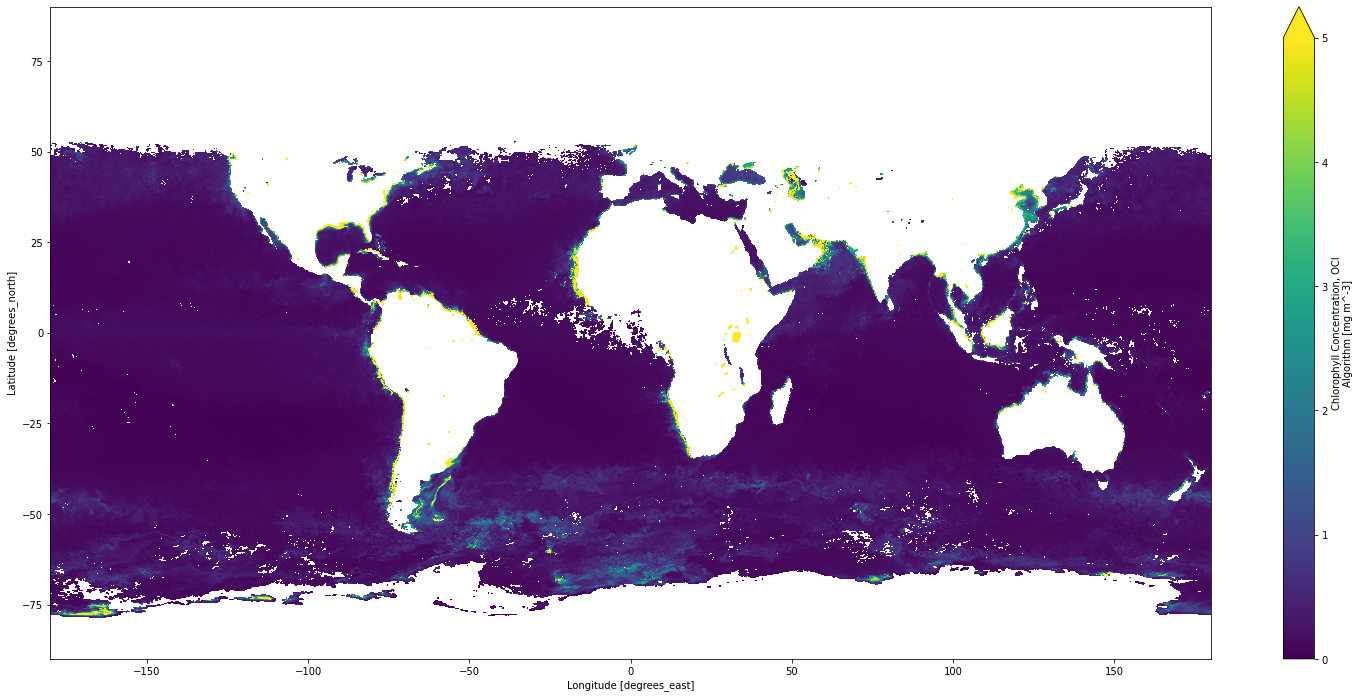

In [5]:
datasets[0].chlor_a.plot(x='lon', y='lat', figsize=(26,12), vmin=0, vmax=5);

Now we can make a plot zoomed in on the Gulf of California using just 1 dataset.

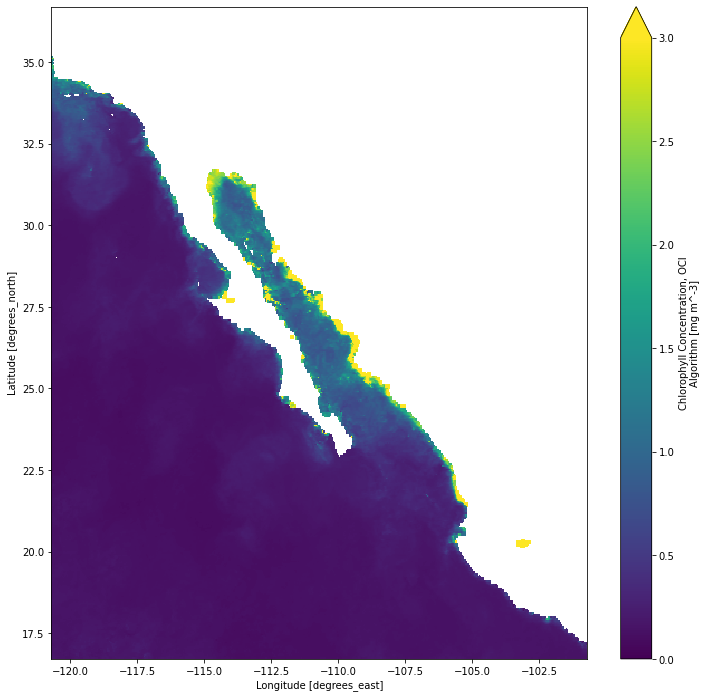

In [6]:
site_lat = 26.7
site_lon = -110.7

ps_slice = datasets[0].sel(lat=slice(site_lat+10, site_lat-10), lon=slice(site_lon-10, site_lon+10))

ps_slice.chlor_a.plot(x='lon', y='lat', figsize=(12,12), vmin=0, vmax=3)

Now let's plot all 12 months of the year at this location and see how chlorophyll levels change throughout the year 2019.

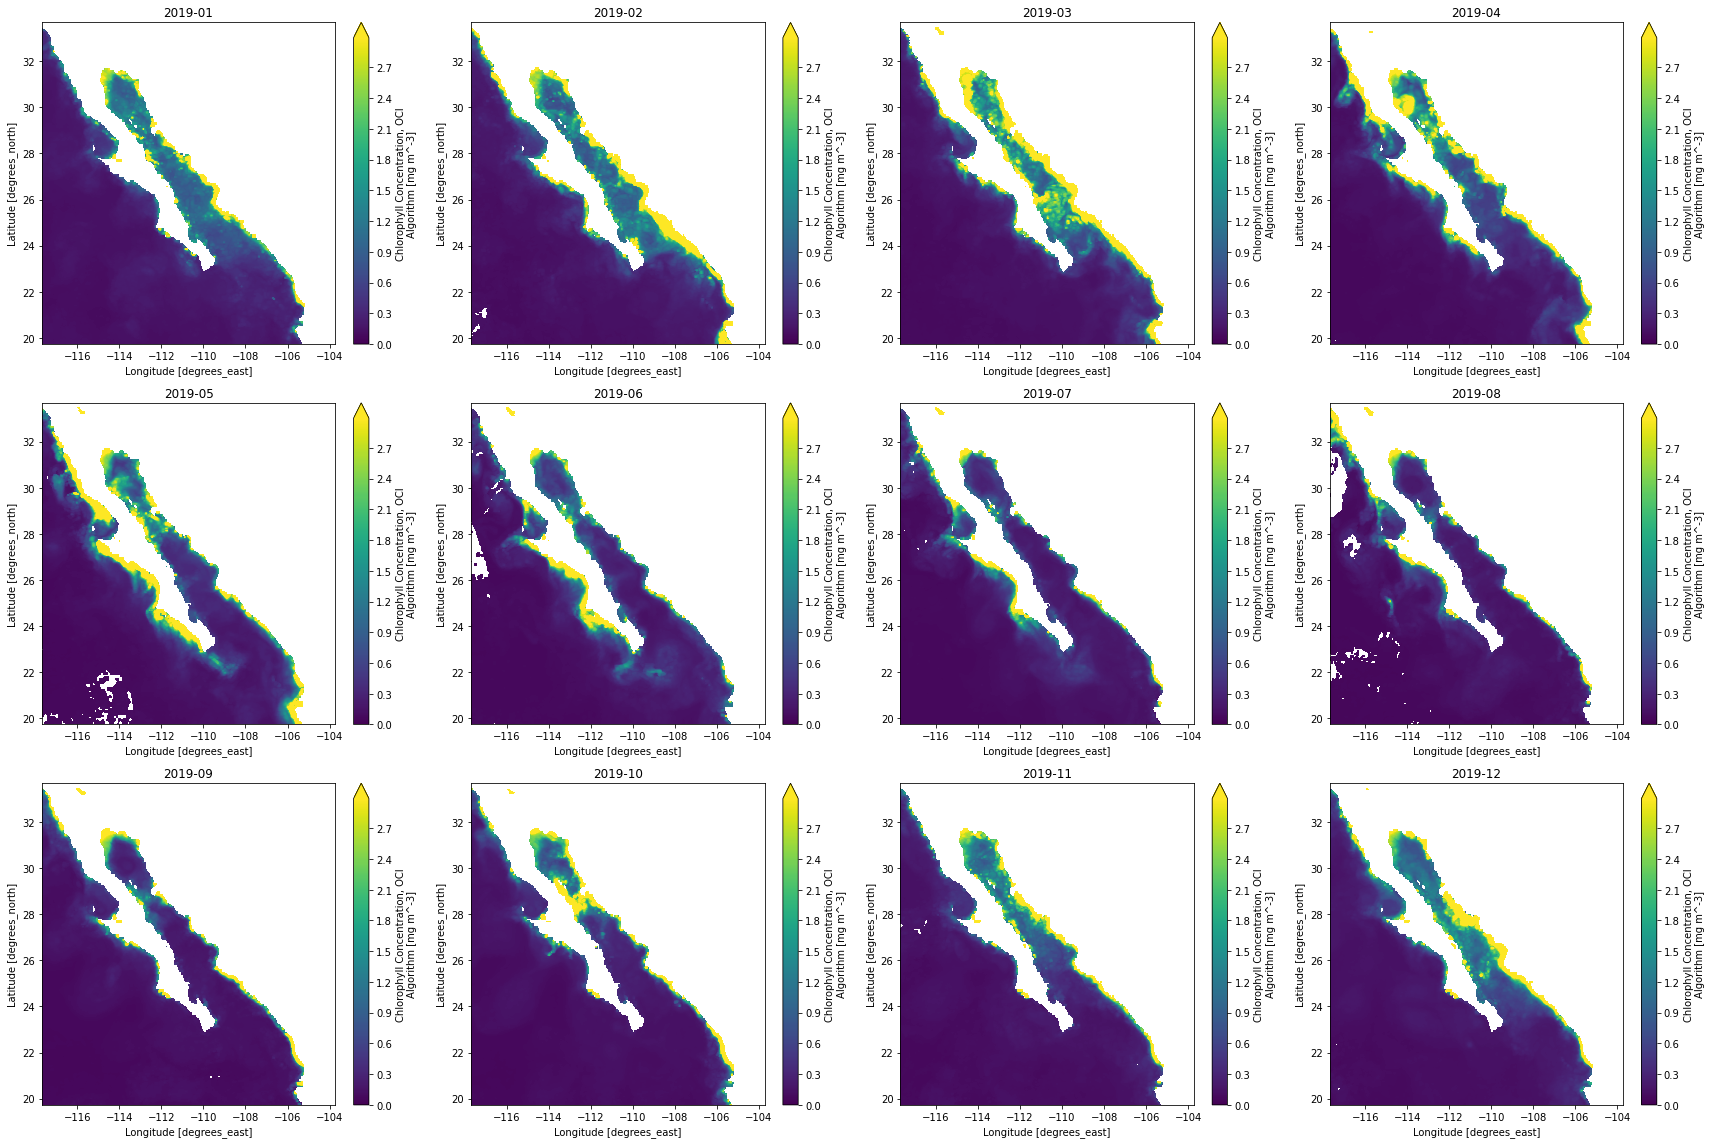

In [7]:
# Set colorbar values. May take trial and error to get the level of detail you are aiming for.
vmin = 0.0
vmax = 3.0
box_lim = 7

# Set levels for resolution of colorbar. Change the 0.01 value for higher or lower resolution. 
lvl = np.arange(vmin, vmax, 0.01).tolist()

# Create subplots
f, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(3, 4, figsize=(24,16))
ax_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]

# Create a plot for every month of the year
for i in range(len(ax_list)):
    ds = datasets[i]
    ds_slice = ds.sel(lat=slice(site_lat+box_lim, site_lat-box_lim), lon=slice(site_lon-box_lim, site_lon+box_lim))    # Select location
    ds_slice.chlor_a.plot.contourf(x='lon', y='lat', ax=ax_list[i], vmin=vmin, vmax=vmax, levels=lvl)
    ax_list[i].set_title(ds.attrs['time_coverage_start'][:7])
    
plt.tight_layout()
plt.savefig('./visualizations/gulf_of_california_all.png')

I also wanted to look at the mouth of a river, because river outflows can carry phytoplankton and nutrients out to sea. Fun to look at, with strong seasonality, but I had trouble finding a river with minimal cloud cover. It's a lot of trial and error, I tested out the Columbia, the Rio Grande, and the Amazon, but wasn't completely satisfied with any of them. The Amazon is plotted below, view it at your leisure! 

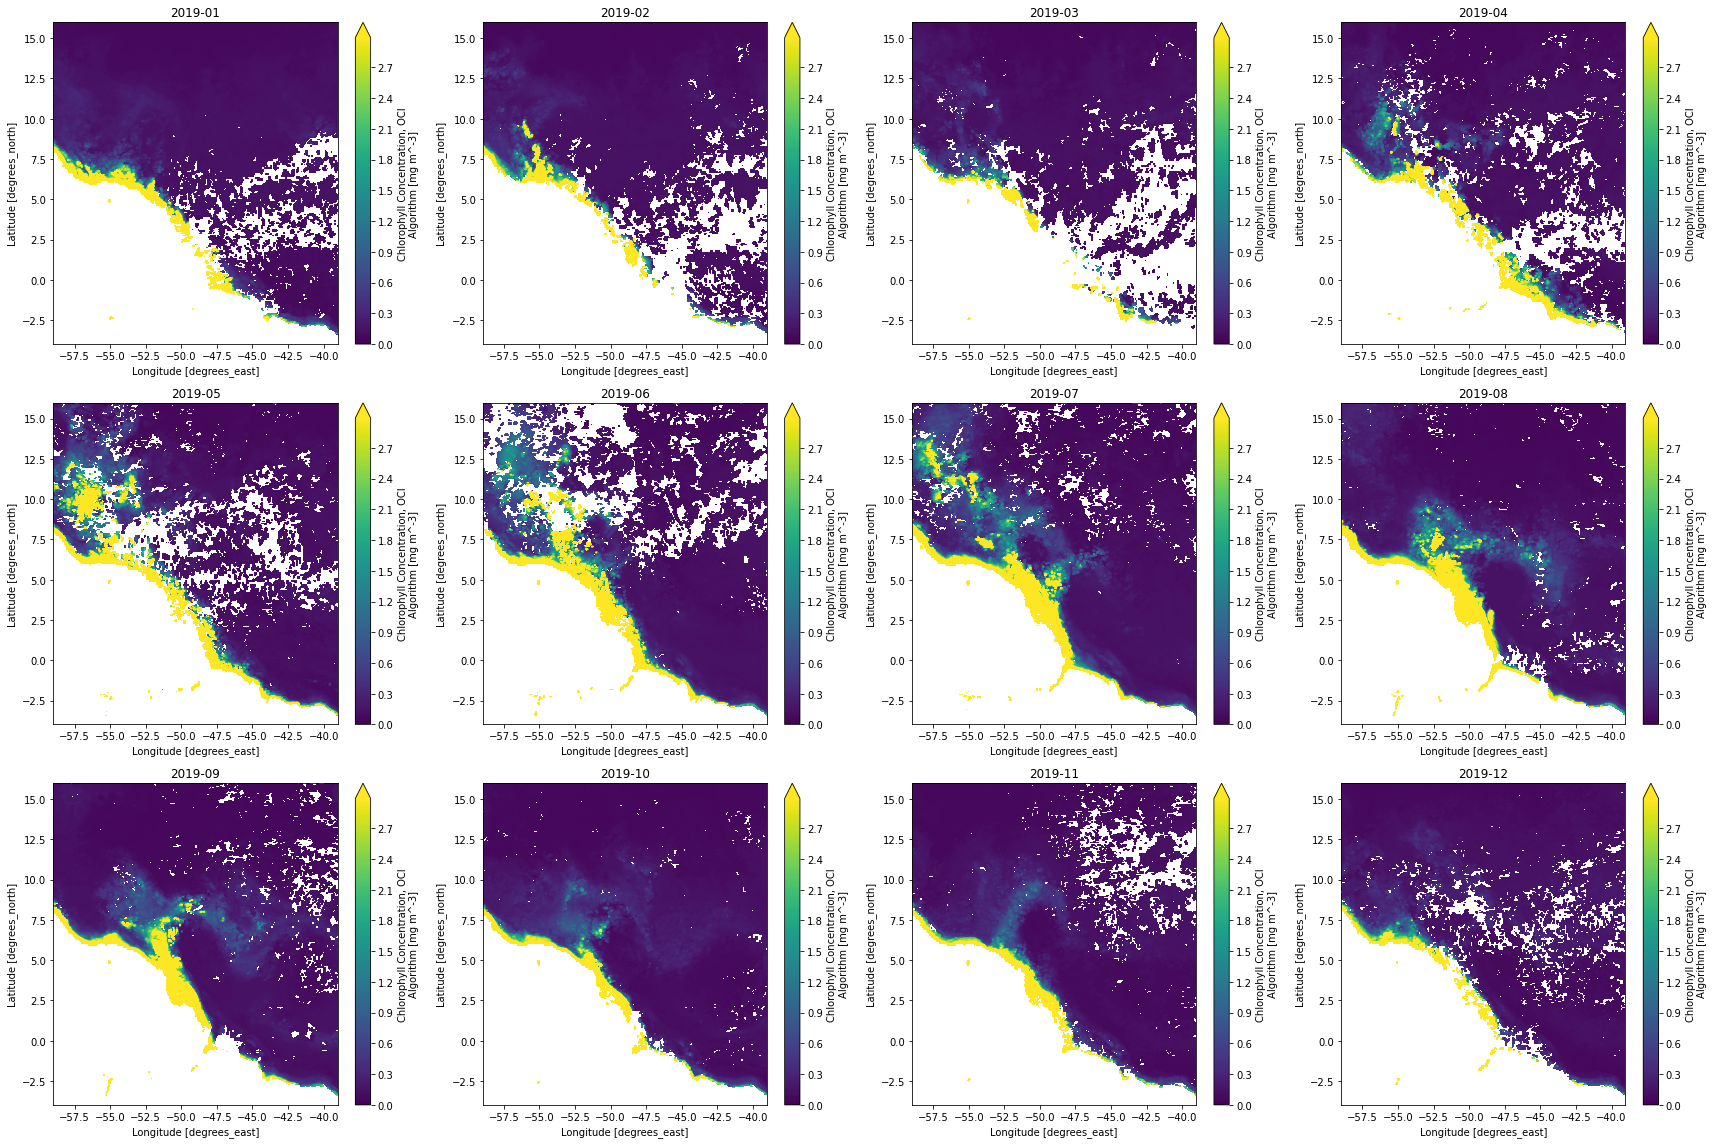

In [8]:
# Set colorbar values. May take trial and error to get the level of detail you are aiming for.
vmin = 0.0
vmax = 3.0

box_lim = 10
site_lat = 6
site_lon = -49

# Set levels for resolution of colorbar. Change the 0.01 value for higher or lower resolution. 
lvl = np.arange(vmin, vmax, 0.01).tolist()

f, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(3, 4, figsize=(24,16))

ax_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]

for i in range(len(ax_list)):
    ds = datasets[i]
    ds_slice = ds.sel(lat=slice(site_lat+box_lim, site_lat-box_lim), lon=slice(site_lon-box_lim, site_lon+box_lim))    # Select location
    ds_slice.chlor_a.plot.contourf(x='lon', y='lat', ax=ax_list[i], vmin=vmin, vmax=vmax, levels=lvl)
    ax_list[i].set_title(ds.attrs['time_coverage_start'][:7])
    
plt.tight_layout()
plt.savefig('./visualizations/river_all.png')

Thanks for viewing!